In [ ]:
!pip install pandasai

In [ ]:
!pip install lida
!pip install lida[transformers]
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SmartDataframe

A SmartDataframe is a pandas (or polars) dataframe that inherits all the properties and methods from the `pd.DataFrame`, but also adds conversational features to it.

In [ ]:
from pandasai import SmartDataframe

### Importing from a pandas dataframe

To import from a pandas dataframe, you need to import the pandas libraries and create a dataframe first.

In [ ]:
import pandas as pd

In [ ]:
#Dataframe creation / Import dataset(csv)
path = '/content/drive/MyDrive/Colab Notebooks/titanic.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Since PandasAI is powered by a LLM,
# By default, we will be using LLM --> **BambooLLM**.

In [ ]:
import os

os.environ['PANDASAI_API_KEY'] = "$2a$10$qRm2WxEQUQiUQr9pL/jcgexrBqyjKdL/WIb1JPr36q04tPHrDHjPK"

In [ ]:
sdf = SmartDataframe(df)

Now that we have instantiated the LLM, we can finally instantiate the `SmartDataframe`

You can now query it in natural language

In [ ]:
#Calulating mean
sdf.chat("what is the mean of age column")

'The mean of the age column is 29.69911764705882'

In [ ]:
#Code generator using NLP of last prompt result
print(sdf.last_code_generated)

mean_age = dfs[0]['Age'].mean()
result = {'type': 'string', 'value': f'The mean of the age column is {mean_age}'}


In [ ]:
sdf.chat("Return the count of male and female from sex column")

,Sex
male,577
female,314


In [ ]:
sdf.chat("What's the standard deviation of fare column?")

49.6934285971809

In [ ]:
sdf.chat('what is name of passenger whose fare is highest')

'The passenger with the highest fare is Ward, Miss. Anna.'

# **Code Generator**

In [ ]:
print(sdf.last_code_generated)

highest_fare_passenger = dfs[0][dfs[0]['Fare'] == dfs[0]['Fare'].max()]['Name'].values[0]
result = {'type': 'string', 'value': f'The passenger with the highest fare is {highest_fare_passenger}.'}


# **### Plotting a chart using LLM & Prompts from smartDataframe & BambooLLM**

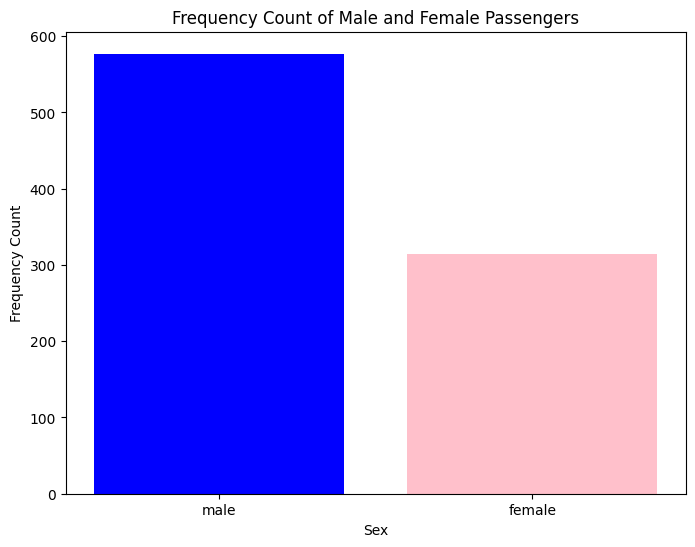

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
sdf.chat("Plot a histogram of sex column with male and female fequncy count")

You can also provide additional instructions. For example, imagine you want to use different colors for each bar. You just need to ask to PandasAI:

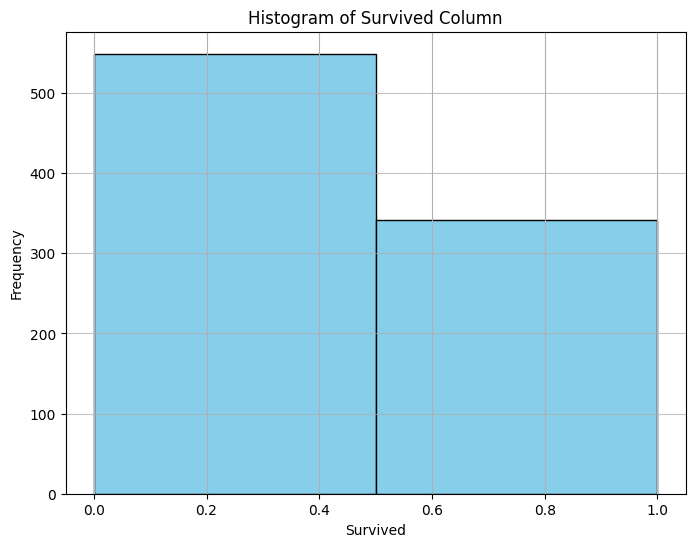

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
sdf.chat("Plot a histogram of survived column")

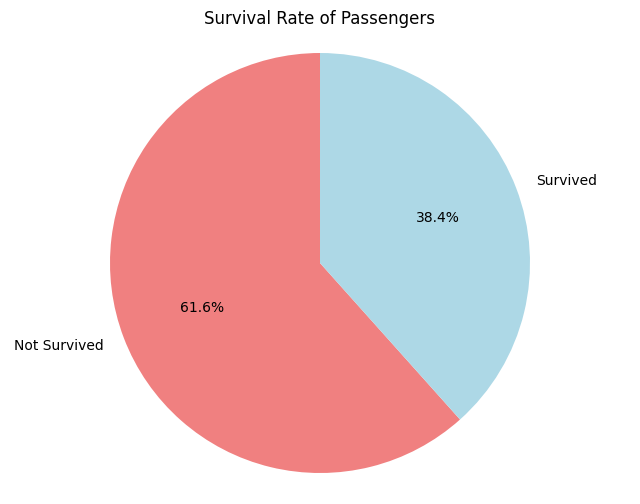

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned



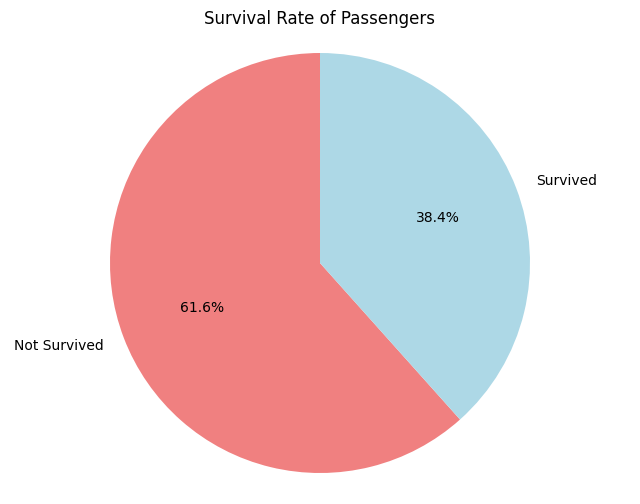

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned



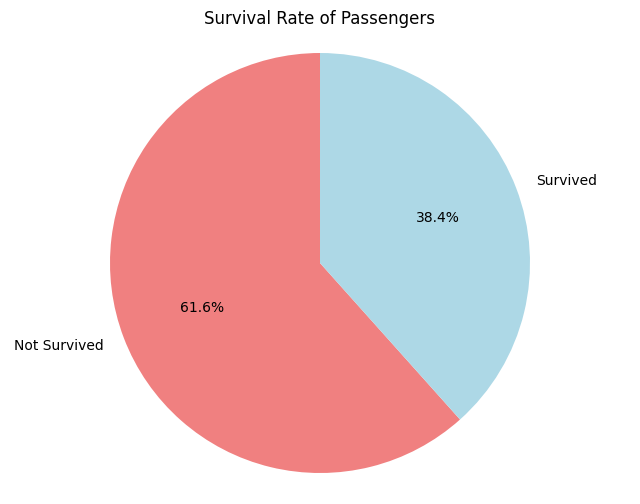

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned



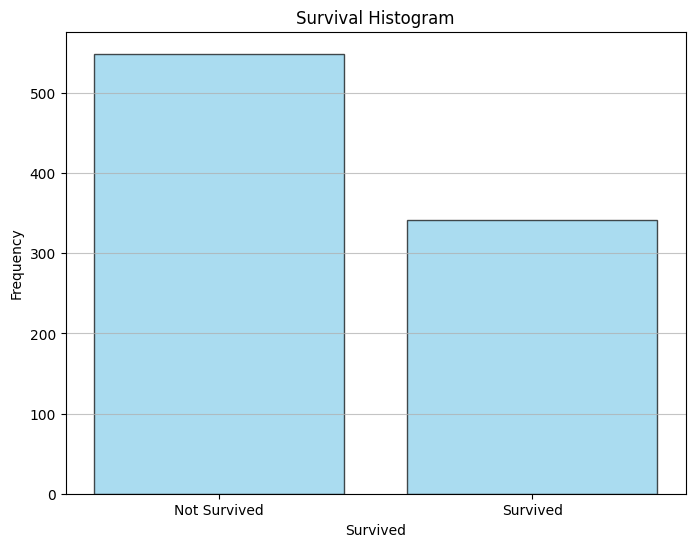

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: No result returned
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [ ]:
sdf.chat("Plot the pie chart of survived column")

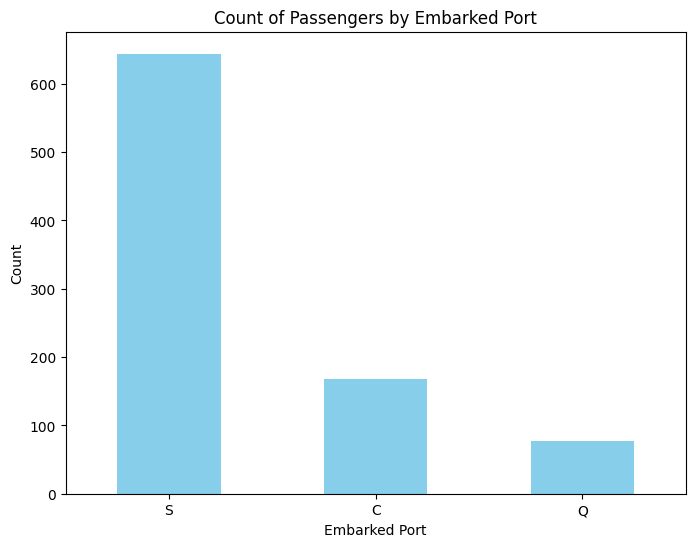

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
sdf.chat("Plot a barchart of Embarked column with count of each category")

# **Process to run and deploy Streamlit app on colab**

In [1]:
%%writefile app.py

Writing app.py


In [2]:
#PUT ENITRE STREAMLIT CODE IN app.py in this local session

In [3]:
! wget -q -O - ipv4.icanhazip.com

34.145.194.98


In [4]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.145.194.98

In [5]:
!touch .env

In [6]:
!ls -a

.  ..  app.py  .config	.env  sample_data


In [7]:
!echo 'PANDASAI_API_KEY="$2a$10$qRm2WxEQUQiUQr9pL/jcgexrBqyjKdL/WIb1JPr36q04tPHrDHjPK"' > .env

In [8]:
!cat .env

PANDASAI_API_KEY="$2a$10$qRm2WxEQUQiUQr9pL/jcgexrBqyjKdL/WIb1JPr36q04tPHrDHjPK"


In [10]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [11]:
!wget -q -O - https://loca.lt/mytunnelpassword
! streamlit run app.py & npx localtunnel --port 8501

34.145.194.98[..................] / rollbackFailedOptional: verb npm-session 28e4dc2fab2d477


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.194.98:8501

npx: installed 22 in 1.817s
your url is: https://tame-mirrors-think.loca.lt
/root/.npm/_npx/732/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:41629 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/732/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
  Stopping...
